## 6.4.2. Linear regression - making a model

## Table of contents:
### 1. Import libraries and dataset
### 2. Build linear regression model - agric_gross_prod_value and total_emissions
### 2.1. Prepare data for regression analysis
### 2.2. Regression analysis
##

### 1. Import libraries and dataset

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [2]:
# Create path
path = r'C:\Users\marta\OneDrive\Documents\A6 Personal Project'

In [3]:
# Import dataset
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'emissions_macro_indicators_final.csv'))

In [4]:
# Check output
df.shape

(3755, 15)

In [5]:
# Check output
df.head()

,Unnamed: 0,country,year,country_code,temp_change,total_population,population_category,total_emissions,emissions_CO2,emissions_N2O,emissions_CH4,agric_export,agric_import,gdp,agric_gross_prod_value
0,0,Afghanistan,2002,4,1.365,21000.256,Low population,695.719823,650.760809,0.524767,44.434247,35964.0,303167.0,4141.523943,3403032.0
1,1,Afghanistan,2003,4,0.587,22645.130,Low population,713.515557,662.122718,0.556194,50.836645,58782.0,451001.0,4729.042179,3403032.0
2,2,Afghanistan,2004,4,1.373,23553.551,Low population,704.272007,652.141129,0.494035,51.636843,64919.0,500790.0,5388.482107,3403032.0
3,3,Afghanistan,2005,4,0.401,24411.191,Low population,737.718469,679.839519,0.498897,57.380053,78944.0,743294.0,6220.574147,3403032.0
4,4,Afghanistan,2006,4,1.720,25442.944,Low population,771.563510,708.516693,0.512822,62.533995,79550.0,806212.0,7104.711445,3403032.0


### 2. Build linear regression model - agric_gross_prod_value and total_emissions

### 2.1. Prepare data for regression analysis

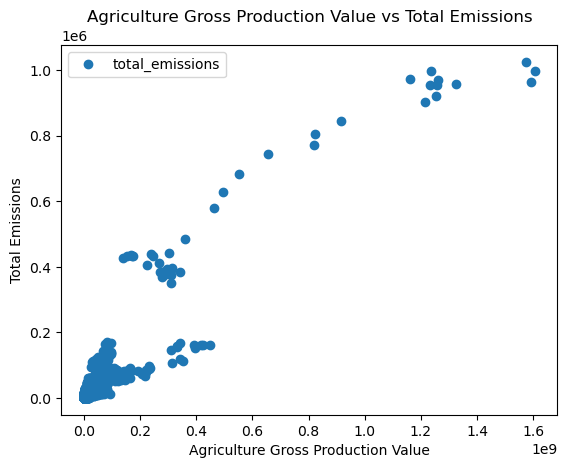

In [6]:
# Create a scatterplot for credit_to_agric and agric_import

df.plot(x = 'agric_gross_prod_value', y='total_emissions',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Agriculture Gross Production Value vs Total Emissions')  
plt.xlabel('Agriculture Gross Production Value')  
plt.ylabel('Total Emissions')  
plt.show()

#### Hypothesis: 
When agriculture gross production value increases, total greenhouse gas emissions go up as well.

In [7]:
# Reshape the variables into NumPy arrays and put them into separate objects
X = df['agric_gross_prod_value'].values.reshape(-1,1)
y = df['total_emissions'].values.reshape(-1,1)

In [8]:
# Check the result
X

array([[3403032.],
       [3403032.],
       [3403032.],
       ...,
       [3403032.],
       [3403032.],
       [3403032.]])

In [9]:
# Check the result
y

array([[ 695.719823],
       [ 713.515557],
       [ 704.272007],
       ...,
       [1536.775703],
       [1384.372886],
       [1621.812144]])

In [10]:
# Split data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 2.2. Regression analysis

In [11]:
# Create a regression object
regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [12]:
# Fit the regression object onto the training set
regression.fit(X_train, y_train)

LinearRegression()

In [13]:
# Predict the values of y using X
y_predicted = regression.predict(X_test)

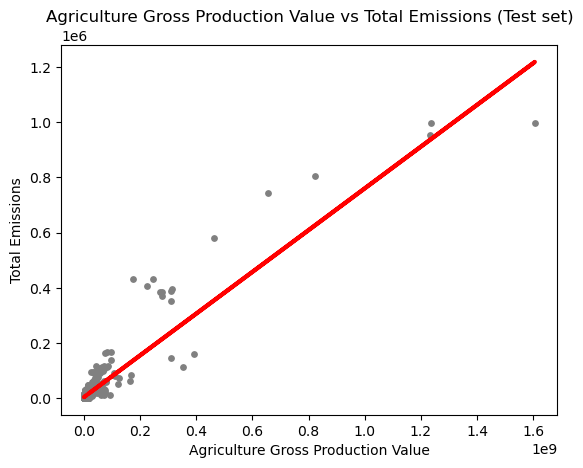

In [14]:
# Create a plot that shows the regression line from the model on the test set
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Agriculture Gross Production Value vs Total Emissions (Test set)')
plot_test.xlabel('Agriculture Gross Production Value')
plot_test.ylabel('Total Emissions')
plot_test.show()

The line doesn't seem to fit the data perfectly. There are lots of scattered points at the left side of the chart.

In [15]:
# Create objects that contain the model summary statistics
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score

In [16]:
# Print the model summary statiscs
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.0007573]]
Mean squared error:  678850174.6170412
R2 score:  0.8747038824615343


When agriculture gross production value increases, total emissions increase by 0.0008. Mean squared error is very large, meaning the data is not described well by this model, even though the R2 is pretty high.  

In [17]:
# Check predicted values
y_predicted

array([[ 5169.90721808],
       [ 4885.92097083],
       [ 9265.7858998 ],
       ...,
       [ 3162.13424185],
       [10165.85658394],
       [19669.29539591]])

In [18]:
# Create a dataframe comparing the actual and predicted values of y
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,4560.066020,5169.907218
1,1370.157405,4885.920971
2,1564.297532,9265.785900
3,499.177231,4730.459669
4,1908.070867,3790.492218
5,1443.613381,4394.821865
6,36202.342504,20323.025150
7,956.473074,5658.878314
8,23161.747256,11122.498237
9,5531.166056,5658.878314


Predicted results differ a lot from the actual ones. This difference, along with the mean squared error, tells me that the linear regression model doesn't describe the data in the best way. The relationship between these two variables might be described better by a non-linear regression model.

##### Compare how the regression fits the training set

In [19]:
# Predict
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [20]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [21]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.0007573]]
Mean squared error:  590529684.9875554
R2 score:  0.8764777151107415


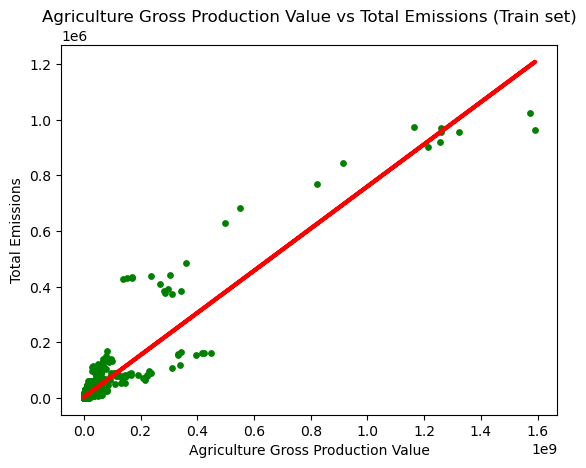

In [22]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Agriculture Gross Production Value vs Total Emissions (Train set)')
plot_test.xlabel('Agriculture Gross Production Value')
plot_test.ylabel('Total Emissions')
plot_test.show()